## Project #1


```
Alexander Baquiax
PIO | Econometría II
12007988
```


In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [43]:
colum_names=['price', 'quality', '1st_floor_square_feet', "rooms", "built_year", "lotfrontage"]
raw = np.load('data/data.npy')

In [44]:
dataset = pd.DataFrame(raw, columns=colum_names)
dataset.head().append(dataset.tail())

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0
1459,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [45]:
trainging_set_size = int(len(dataset) * 0.8)
trainging_set_size

1168

In [46]:
training_set = pd.DataFrame(dataset.values[:int(trainging_set_size)], columns=colum_names)
training_set.head().append(training_set.tail())


,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


In [47]:
testing_set = pd.DataFrame(dataset.values[trainging_set_size:], columns=colum_names)
testing_set.head().append(testing_set.tail())

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0
291,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [48]:
dataset.describe()

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [49]:
data = []
for colname in dataset.columns:
    column = dataset[colname]
    column_range = column.max() - column.min()
    data.append([colname, column.mean(), column.max(), column.min(), column_range, column.std()])

result = pd.DataFrame(data, columns=['variable', 'mean', 'max', 'min', 'range', 'std'])

result.head(6)
    

,variable,mean,max,min,range,std
0,price,180921.195890,755000.0,34900.0,720100.0,79442.502883
1,quality,6.099315,10.0,1.0,9.0,1.382997
2,1st_floor_square_feet,1162.626712,4692.0,334.0,4358.0,386.587738
3,rooms,6.517808,14.0,2.0,12.0,1.625393
4,built_year,1971.267808,2010.0,1872.0,138.0,30.202904
5,lotfrontage,70.049958,313.0,21.0,292.0,24.284752


### 4. Histogramas


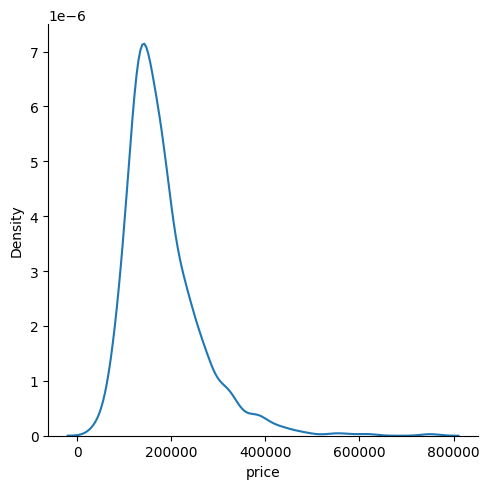

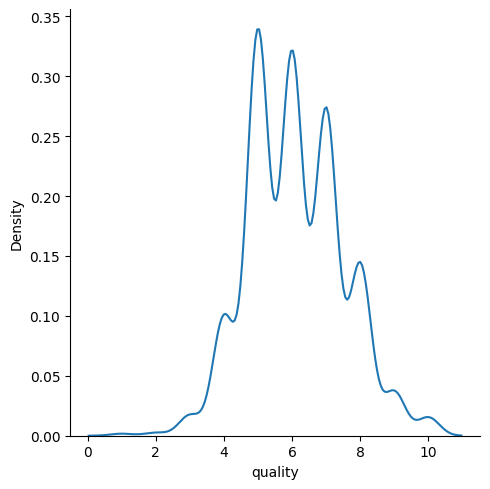

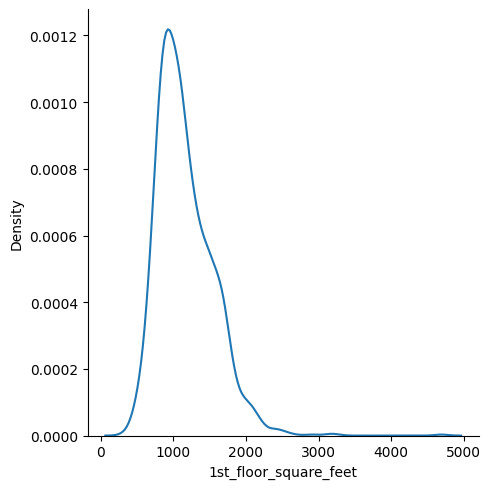

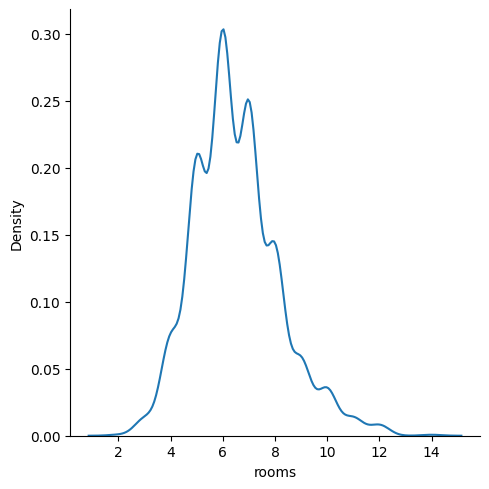

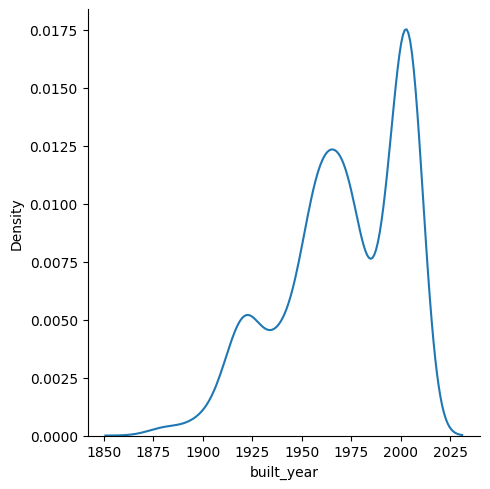

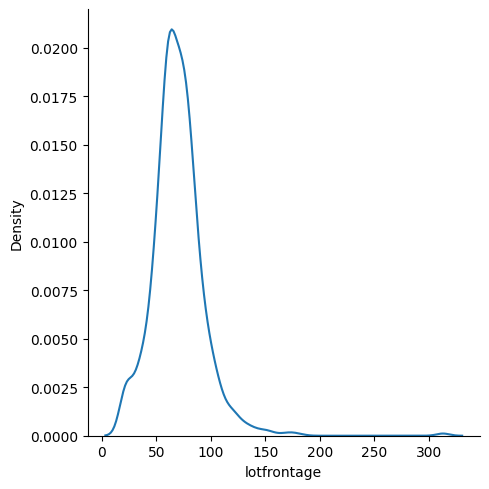

In [50]:
### 4. Histogramas
import seaborn as sns 

for colname in dataset.columns:
    sns.displot(dataset[colname],kind="kde")

### 5. Correlaciones

In [51]:
correlation = dataset.corr(method='pearson')
correlation


,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
price,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
quality,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1st_floor_square_feet,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
rooms,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
built_year,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
lotfrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


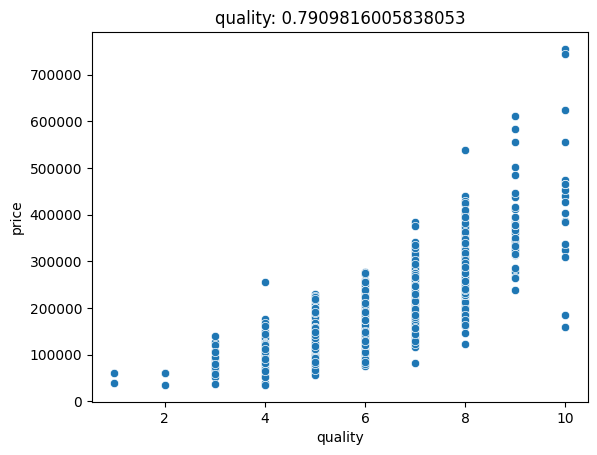

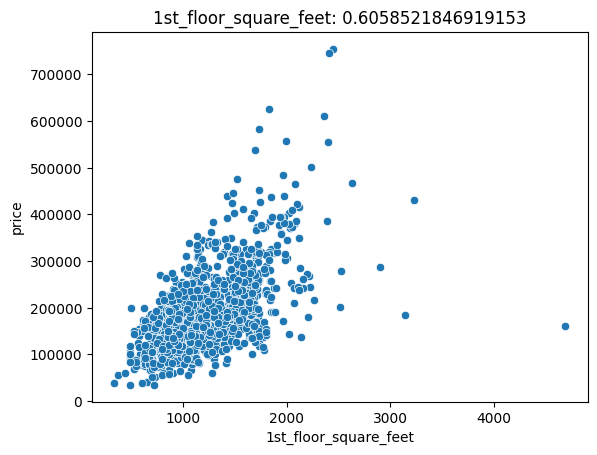

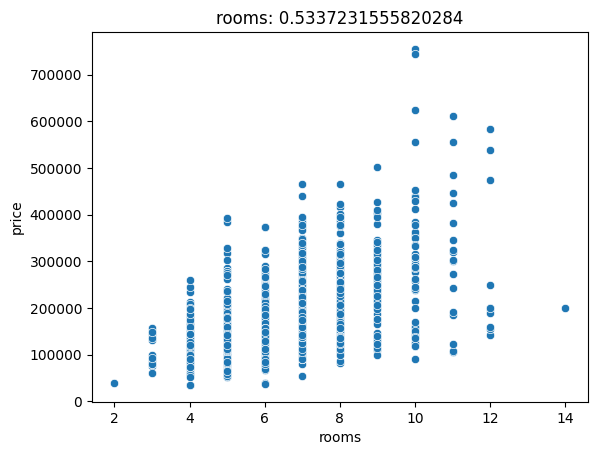

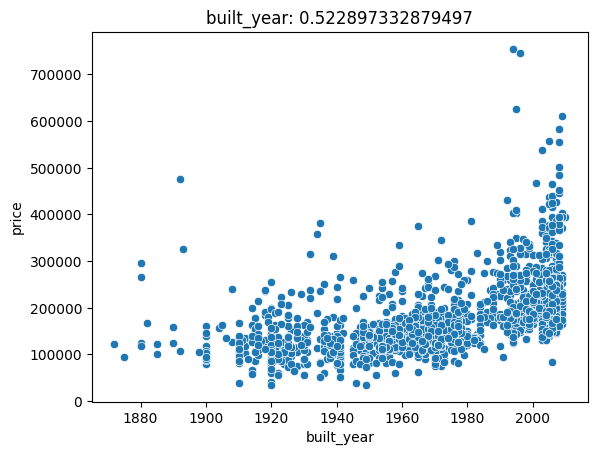

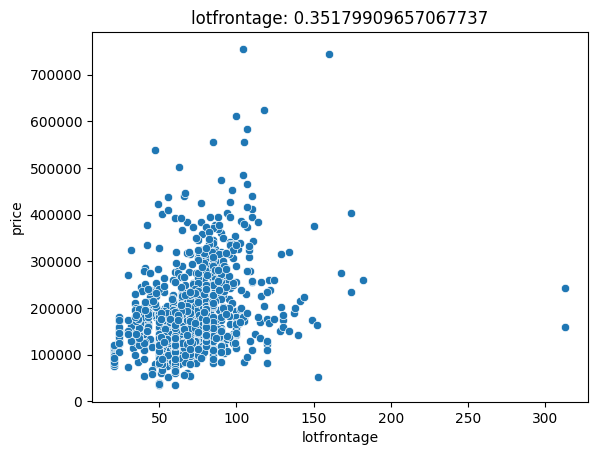

In [52]:
for colname in dataset.columns:
    if colname == "price":
        continue
    
    plt.figure()
    sns.scatterplot(data=dataset, x=colname, y="price").set_title(f"{colname}: {correlation['price'][colname]}")

Pareciera que las dos variables con mayor correlación son: `quality` y `1st_floor_saquare_feet`. `quality` tiene sentido ya que todos valoramos más una casa respecto a su calidad, y `1st_floor_saquare_feet` también tiene sentido ya que entre más grande sea la casa, más valor le damos.

### 6. Regresiones 

#### Modelo manual

In [80]:
def train_model(x = np.array([]), y = np.array([]), epochs = 0, learning_rate = 1.0, print_every = 1):
    all_betas = np.array([])
    all_errors = np.array([])


    n = len(x)

    b1 = 0.0
    b2 = 0.0

    for epoch in range(epochs):
        y_predicted = b1 + b2 * x
        e = ((y - y_predicted) ** 2) / 2*n

        all_errors = np.append(all_errors, e.sum())
        all_betas = np.append(all_betas, [b1, b2])

        e_b1 = ((y_predicted - y) * x) / n
        e_b2 = (y_predicted - y) / n

        if epoch % print_every == 0:
            print(f"#{epoch} => error: {e.sum()}")

        b1 = b1 - learning_rate * e_b1.sum()
        b2 = b2 - learning_rate * e_b2.sum()


    return all_betas, all_errors


#0 => error: 84.0
#1 => error: 77.42
#2 => error: 71.37694629333333
#3 => error: 65.8270943393529
#4 => error: 60.73026365637109
#5 => error: 56.049547442933175
#6 => error: 51.7510458574569
#7 => error: 47.80362102869323
#8 => error: 44.17867202650689
#9 => error: 40.84992816672663
#10 => error: 37.79325915631178
#11 => error: 34.986500706784405
#12 => error: 32.40929435566285
#13 => error: 30.04294033831154
#14 => error: 27.87026244693524
#15 => error: 25.875483900074887
#16 => error: 24.044113325533775
#17 => error: 22.362840032750483
#18 => error: 20.81943781776871
#19 => error: 19.402676605617664
#20 => error: 18.10224129155652
#21 => error: 16.908657194661384
#22 => error: 15.813221585019686
#23 => error: 14.807940789689898
#24 => error: 13.885472422901154
#25 => error: 13.039072322999715
#26 => error: 12.26254581266387
#27 => error: 11.550202930152611
#28 => error: 10.896817308051418
#29 => error: 10.297588402338185
#30 => error: 9.74810679880498
#31 => error: 9.24432234611039
#

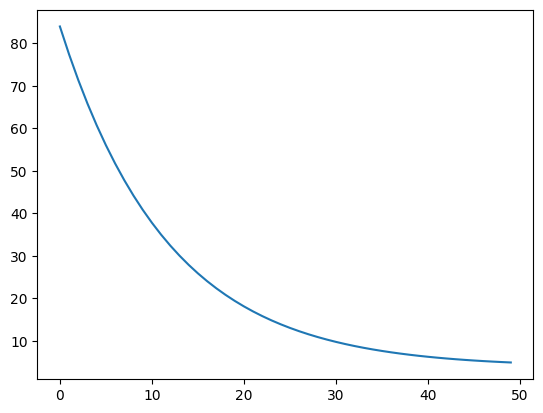

In [81]:
result = train_model(np.array([1,2,3]), np.array([2,4,6]), 50, 0.01)

## Ploting error history
plt.plot(result[1])


100 2
100 4
100 6
100 8
100 10
100 12
100 14
100 16
100 18
100 20
100 22
100 24
100 26
100 28
100 30
100 32
100 34
100 36
100 38
100 40
100 42
100 44
100 46
100 48
100 50
100 52
100 54
100 56
100 58
100 60
100 62
100 64
100 66
100 68
100 70
100 72
100 74
100 76
100 78
100 80
100 82
100 84
100 86
100 88
100 90
100 92
100 94
100 96
100 98
100 100


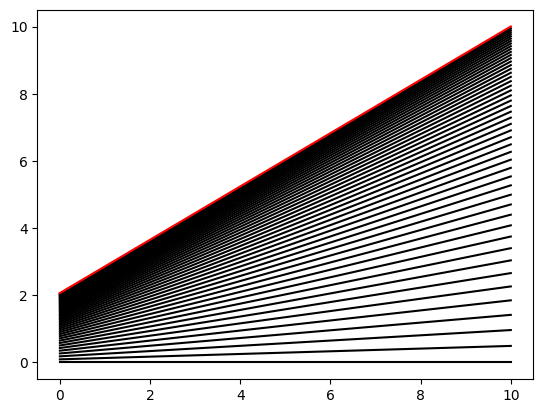

In [93]:
for i in range(0, len(result[0]), 2):
    b1 = result[0][i]
    b2 = result[0][i + 1]

    x =  np.linspace(0, 10, 100)
    y = b1 + b2 * x
    
    color = "red" if i == (len(result[0]) - 2) else 'black'

    plt.plot(x, y, color=color)

